# Python Übung 3 - Fehlermaße für Regression

In [32]:
import numpy as np
import seaborn as sns

Laden der Zahlen aus Übung 1 (und plotten)

In [33]:
df = sns.load_dataset("anscombe")

Selektion eines der vier Datensätze

In [34]:
#df.loc[df['x']>8]
#f.groupby("dataset").describe()
dataSet3 = df.loc[df["dataset"]=='III']

Linare Regression durchführen 

In [35]:
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression

X = dataSet3.iloc[:, 1].values.reshape(-1, 1)  # numpy! 
Y = dataSet3.iloc[:, 2].values.reshape(-1, 1)  

reg = LinearRegression()  
reg.fit(X, Y) 
print(reg.score(X, Y) , " " , reg.coef_ , " " , reg.intercept_)

0.6663240410665592   [[0.49972727]]   [3.00245455]


Werte vorhersagen und einzeichnen

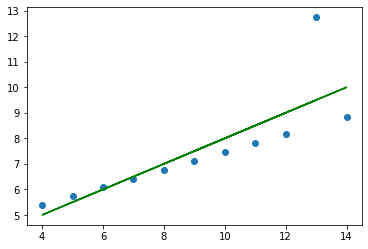

In [36]:
Y_pred = reg.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='green')
plt.show()

In [37]:
from sklearn.linear_model import Lasso

# Create and fit a regression to a dataSet
def create_regression(dataSet, show=True, method="normal"):
    # Make and fit regression
    dataX = dataSet.iloc[:, 1].values.reshape(-1, 1)
    dataY = dataSet.iloc[:, 2].values.reshape(-1, 1)

    if method == "lasso":
        regression = Lasso()
    else:
        regression = LinearRegression()

    regression.fit(dataX, dataY)

    # Predict values
    prediction = regression.predict(dataX)

    if show:
        plt.scatter(dataX, dataY)
        plt.plot(dataX, prediction, color='green')
        plt.show()


    return regression, prediction


# Aufgaben
1. Lesen Sie sich die Metrics durch. Siehe Link https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
2. Vergleichen Sie diese  mit denen aus der Vorlesung.
3. Bewerten Sie die Trendlinien für alle vier Datensätze. Was schließen Sie daraus? 
4. Löschen Sie einzelne Ausreißer und bewerten Sie erneut.
5. Was ist das Trainings- und Testset in der Übung hier? Wie sollte es eigentlich sein? 
6. Verwenden Sie ein anderes Regressionsverfahren und prüfen Sie, ob es besser ist!

## Vergleich Metrics mit Vorlesung

### Mean Squared Error
Wird durch `mean_squared_error()` implementiert. Die Formeln sind identisch.

### Mean Absolute Error
Wird durch `mean_absolute_error()` implementiert. Die Formeln sind identisch.

### Mean Absolute Percentage Error
Wird durch `mean_absolute_percentage_error()` implementiert. Allerdings wird hier die Division durch 0 umgangen, indem Epsilon verwendet wird, falls yi 0 ist.

### Minimaler / Maximaler Abstand
Der maximale Abstand wird durch `max_error()` implementiert.
Für den minimalen Abstand ist keine Implementation vorhanden.
### Root Mean Squared Error
Hierzu ist keine Implementierung vorhanden.

### R-Squared
Wird durch `r2_score()` implementiert. Die Formeln sind identisch.


### Implementierung der fehlenden Methoden

In [38]:
import sklearn.metrics as skm

def min_error(y_true, y_pred):
    if len(y_true) == len(y_pred):
        return min(np.abs(y_true - y_pred))
    else:
        return None

def root_mean_squared_error(y_true, y_pred, *other, sample_weight=None, multioutput="uniform_average", squared=True):
    return np.sqrt(skm.mean_squared_error(y_true, y_pred, other, sample_weight, multioutput, squared))

## Bewertung der Trendlinien der vier Datensätze

Die lineare Regression ist gleich, obwohl die Datensätze grundsätzlich andere Formen besitzen.

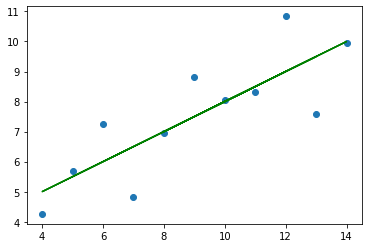

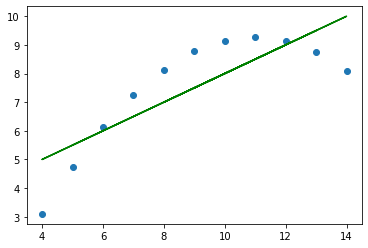

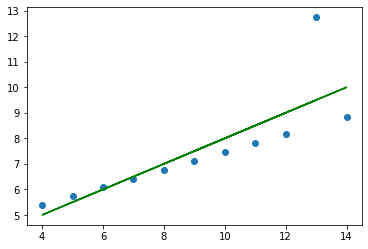

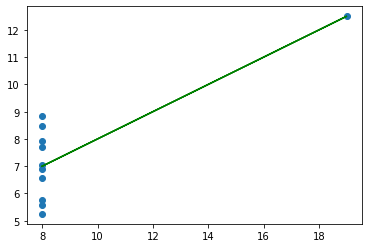

In [39]:
for _, dataset in df.groupby("dataset"):
    _ = create_regression(dataset)

### Entfernen von Ausreißern

Die Ausreißer befindet sich im dritten und vierten Datensatz.

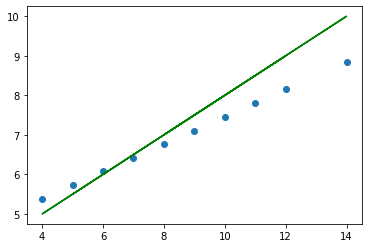

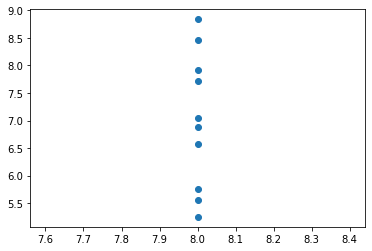

In [40]:
# Ausreißer an 24. Stelle entfernen
_ = create_regression(dataSet3.drop(24))

# Ausreißer an 40. Stelle entfernen
_ = create_regression(df.loc[df["dataset"] == "IV"].drop(40))

### Trainings- / Testset

Hier wird der gesamte Datensatz für das Training verwendet. Es findet also eine Überanpassung statt. Normalerweise sollte hier einer Verteilung von 80% zu 20% stattfinden. Also 80% für das Training und 20% für das Testen und die Validierung.

### Verwendung eines anderen Regressionsverfahrens

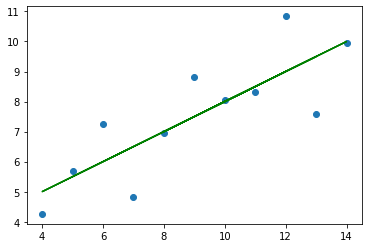

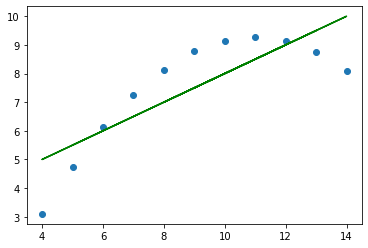

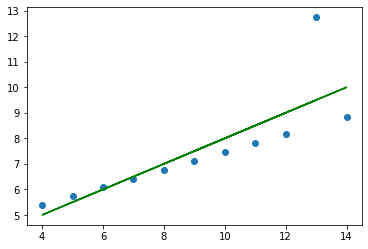

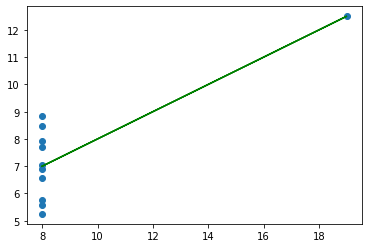

In [41]:
for _, dataset in df.groupby("dataset"):
    _ = create_regression(dataset, method="lasso")